# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [30]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
from rdkit import Chem
from rdkit.Chem import inchi

# To gain access function in src directory
%run ../src/smiles_processing.py

In [31]:
# Path to input and output files
input_file_path = "../data/raw_smile_data.csv"
output_file_path = "../data/smiles_inchikey.csv"

In [32]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has

# Read the input file
input_data = pd.read_csv(input_file_path, header=0, usecols=[0])

# Extract the rows into a list
input_rows = input_data.squeeze().tolist()

In [13]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

# Standardise smile
stand_smile = standardise_smiles(input_rows)

# Remove 'nan' values
filtered_smile = [value for value in stand_smile if not pd.isna(value)]

RDKit ERROR: [19:16:16] Can't kekulize mol.  Unkekulized atoms: 3 10
[19:16:16] Can't kekulize mol.  Unkekulized atoms: 3 10

RDKit ERROR: 


In [14]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

# Create lists to store Inchikey
inchikey_list = []

# Calculate each Inchikey per molecule
for smiles in filtered_smile:
    mol = Chem.MolFromSmiles(smiles)
    inchikey = inchi.MolToInchiKey(mol)
    inchikey_list.append(inchikey)

In [15]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

# Store smile and inchikey in a zipped list
final_data = list(zip(filtered_smile[0:1000], inchikey_list[0:1000]))

# Write the data to the CSV file
with open(input_file_path, 'w', newline='') as f:
    csv_writer = csv.writer(f)
    
    # Write header
    csv_writer.writerow(['smiles', 'inchikey'])
    
    # Write data
    csv_writer.writerows(final_data)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

# eos2ta5 Model

In [17]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

# Load model predictions
eos2ta5_prediction_data = pd.read_csv("../data/eos2ta5_data/eos2ta5_prediction.csv", header=0)

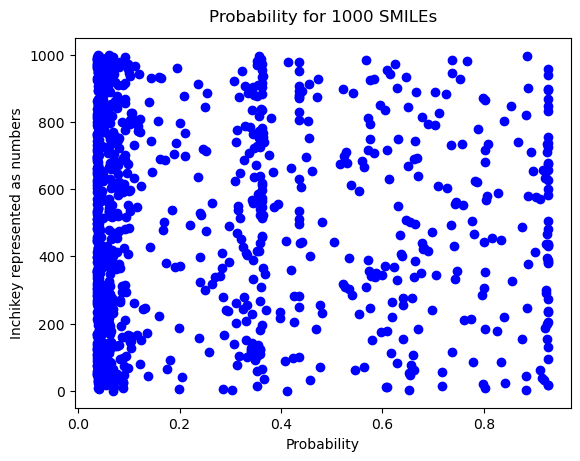

In [29]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

# Scatter plot showing predictions
plt.scatter(eos2ta5_prediction_data["probability"], range(len(eos2ta5_prediction_data["key"])), color='blue', marker='o')
plt.xlabel('Probability')
plt.ylabel('Inchikey represented as numbers')
plt.title("Probability for 1000 SMILEs", pad=12)

plt.show()

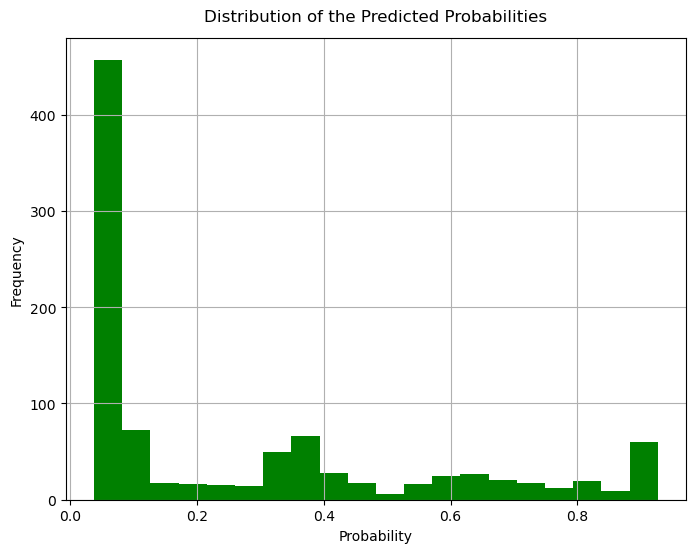

In [27]:
plt.figure(figsize=(8, 6))

plt.hist(eos2ta5_prediction_data["probability"], bins=20, color='green')
plt.title('Distribution of the Predicted Probabilities', pad=12)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()